---
<img src="../assets/grt_logo.png" style="float: left; margin: 20px; height: 55px">

# Garton Research & Trading

_September 4, 2019_

---

## Forecasting Short Term Volatility with Prophet

---

**Context:** The purpose of this study is to use Facebook's [Prophet](https://facebook.github.io/prophet/) package to attempt to forecast short-term volatility, specfically the volatility of the broad U.S. stock market. The starting point will be to attempt to predict the level of the CBOE Volatility Index, or VIX, otherwise known as the 'fear index.' 

Source of VIX data: [CBOE website](http://www.cboe.com/data/historical-options-data)

_Author: Matthew Garton_

In [2]:
# import necessary packages
import pandas as pd
from fbprophet import Prophet

In [3]:
# read in VIX data
vix = pd.read_csv('../data/vix.csv',
                  usecols=[0,2], # Only looking at the 'High' of the day
                  skiprows=2015,
                  header=0, names=['ds','y']) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


TypeError: float() argument must be a string or a number, not 'datetime.datetime'

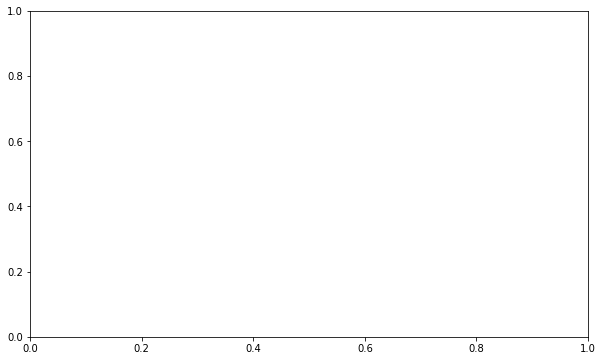

In [5]:
# instantiate and fit model
m = Prophet()
m.fit(vix)

# make predictions
future_vix = m.make_future_dataframe(periods=365*5)
forecast = m.predict(future_vix)

# view predictions
fig1 = m.plot(forecast)

**Note:** I'm encountering what seems to be a known compatibility problem between prophet's plotting functionality and pandas. Will find and implement a fix when I return to this study.